In [39]:
# import zipfile
# import os
# # Path to the zip file

# # Directory to extract the files to
# extract_to_directory = './data/'

# # Unzipping the file
# for file in os.listdir('./data'):
#     with zipfile.ZipFile(os.path.join('./data/', file), 'r') as zip_ref:
#         zip_ref.extractall(extract_to_directory)

# print("File unzipped successfully!")

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
#garbage collector
import gc
gc.enable()

### Loading data

In [2]:
#contains information about product aisles
aisles = pd.read_csv('data/aisles.csv')
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [3]:
#contains information about product departments
dept = pd.read_csv('data/departments.csv')
dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [4]:
order_products_prior = pd.read_csv('data/order_products__prior.csv')
order_products_prior
#Here same number for order_id represents multiple products ordered in that single order?

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0
...,...,...,...,...
32434484,3421083,39678,6,1
32434485,3421083,11352,7,0
32434486,3421083,4600,8,0
32434487,3421083,24852,9,1


In [5]:
order_products_train = pd.read_csv('data/order_products__train.csv')
order_products_train

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
...,...,...,...,...
1384612,3421063,14233,3,1
1384613,3421063,35548,4,1
1384614,3421070,35951,1,1
1384615,3421070,16953,2,1


In [6]:
orders = pd.read_csv('data/orders.csv')
orders

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0
...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0
3421079,1854736,206209,prior,11,4,10,30.0
3421080,626363,206209,prior,12,1,12,18.0
3421081,2977660,206209,prior,13,1,12,7.0


In [7]:
# contains information about the product and in which aisle and which department it is in
products = pd.read_csv('data/products.csv')
products

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13
...,...,...,...,...
49683,49684,"Vodka, Triple Distilled, Twist of Vanilla",124,5
49684,49685,En Croute Roast Hazelnut Cranberry,42,1
49685,49686,Artisan Baguette,112,3
49686,49687,Smartblend Healthy Metabolism Dry Cat Food,41,8


Doubts
If order_id is unique identifier for each order, oka user suppose user_id = 1 multiple times order chesthe appudu each time different order ids generate avtai kada, so appudu order_id ane unknown number meeda manam predictions ela generate chestam?

### Exploratory data analysis

In [8]:
# Function to describe the stats of the data
def get_stats(df):
    columns = df.columns
    dtypes = df.dtypes
    non_null_cnt = df.count()
    null_cnt = df.isnull().sum(axis = 0)
    missing_pct = (null_cnt/non_null_cnt)*100
    no_unique_values = [len(df[col].unique()) for col in df.columns]
    unique_values = [df[col].unique() for col in df.columns]
    
    summary = pd.DataFrame({
        'columns': columns,
        'dtypes': dtypes,
        'Non_null_values': non_null_cnt,
        'Null_values': null_cnt,
        'Missing_percentage': missing_pct,
        'Number_of_unique_values':no_unique_values,
        'Unique_values': unique_values
    })
    
    return summary
    
    

In [9]:
get_stats(aisles)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
aisle_id,aisle_id,int64,134,0,0.0,134,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
aisle,aisle,object,134,0,0.0,134,"[prepared soups salads, specialty cheeses, ene..."


In [10]:
get_stats(dept)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
department_id,department_id,int64,21,0,0.0,21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
department,department,object,21,0,0.0,21,"[frozen, other, bakery, produce, alcohol, inte..."


In [11]:
get_stats(order_products_prior)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
order_id,order_id,int64,32434489,0,0.0,3214874,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1..."
product_id,product_id,int64,32434489,0,0.0,49677,"[33120, 28985, 9327, 45918, 30035, 17794, 4014..."
add_to_cart_order,add_to_cart_order,int64,32434489,0,0.0,145,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
reordered,reordered,int64,32434489,0,0.0,2,"[1, 0]"


In [12]:
get_stats(order_products_train)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
order_id,order_id,int64,1384617,0,0.0,131209,"[1, 36, 38, 96, 98, 112, 170, 218, 226, 349, 3..."
product_id,product_id,int64,1384617,0,0.0,39123,"[49302, 11109, 10246, 49683, 43633, 13176, 472..."
add_to_cart_order,add_to_cart_order,int64,1384617,0,0.0,80,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
reordered,reordered,int64,1384617,0,0.0,2,"[1, 0]"


In [13]:
get_stats(orders)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
order_id,order_id,int64,3421083,0,0.000000,3421083,"[2539329, 2398795, 473747, 2254736, 431534, 33..."
user_id,user_id,int64,3421083,0,0.000000,206209,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
eval_set,eval_set,object,3421083,0,0.000000,3,"[prior, train, test]"
order_number,order_number,int64,3421083,0,0.000000,100,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
order_dow,order_dow,int64,3421083,0,0.000000,7,"[2, 3, 4, 1, 5, 0, 6]"
order_hour_of_day,order_hour_of_day,int64,3421083,0,0.000000,24,"[8, 7, 12, 15, 9, 14, 16, 11, 10, 19, 18, 17, ..."
days_since_prior_order,days_since_prior_order,float64,3214874,206209,6.414217,32,"[nan, 15.0, 21.0, 29.0, 28.0, 19.0, 20.0, 14.0..."


In [14]:
get_stats(products)

,columns,dtypes,Non_null_values,Null_values,Missing_percentage,Number_of_unique_values,Unique_values
product_id,product_id,int64,49688,0,0.0,49688,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
product_name,product_name,object,49688,0,0.0,49688,"[Chocolate Sandwich Cookies, All-Seasons Salt,..."
aisle_id,aisle_id,int64,49688,0,0.0,134,"[61, 104, 94, 38, 5, 11, 98, 116, 120, 115, 31..."
department_id,department_id,int64,49688,0,0.0,21,"[19, 13, 7, 1, 11, 16, 17, 18, 12, 9, 8, 14, 1..."


<Axes: >

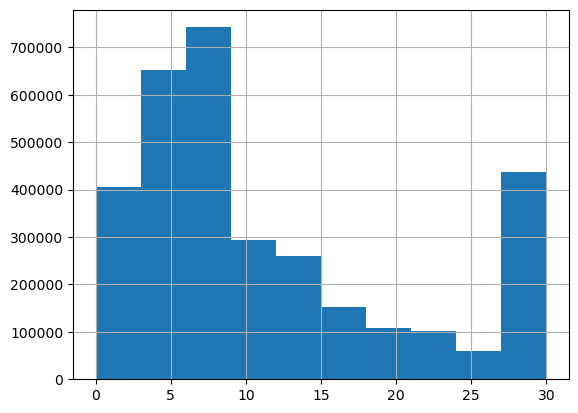

In [15]:
orders['days_since_prior_order'].hist()

In [16]:
# Chaning the eval_set column in orders dataset
orders['eval_set'] = orders['eval_set'].replace({'prior' : 0, 'train' : 1, 'test': 2})
orders['days_since_prior_order'] = orders['days_since_prior_order'].fillna(30)
#Here the intuition for filling the NA values with 30 is 30 days represents approximately one month. If a customer has no prior order history, it might be reasonable to assume that their next order will occur in about a month.

In [17]:
# the test dataset, we have to predict what products will they reorder?
orders[orders['eval_set'] == 2 ]

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
38,2774568,3,2,13,5,15,11.0
44,329954,4,2,6,3,12,30.0
53,1528013,6,2,4,3,16,22.0
96,1376945,11,2,8,6,11,8.0
102,1356845,12,2,6,1,20,30.0
...,...,...,...,...,...,...,...
3420918,2728930,206202,2,23,2,17,6.0
3420929,350108,206204,2,5,4,14,14.0
3421001,1043943,206206,2,68,0,20,0.0
3421018,2821651,206207,2,17,2,13,14.0


Exploratory Data Analysis

In [18]:
#For each user_id, how many orders they are putting?
orders.groupby(['user_id'])['order_number'].count()

user_id
1         11
2         15
3         13
4          6
5          5
          ..
206205     4
206206    68
206207    17
206208    50
206209    14
Name: order_number, Length: 206209, dtype: int64

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='order_number', ylabel='Count'>

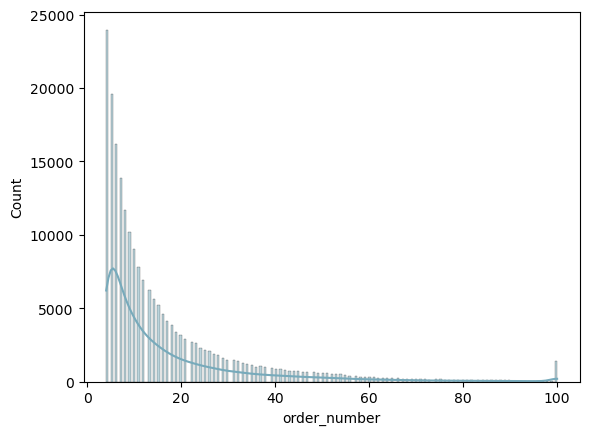

In [19]:
custom_palette = ["#7AB", "#EDA", "#7AB", "#EDA", "#7AB", "#EDA", "#7AB"]
# Set the global palette
sns.set_palette(custom_palette)
sns.histplot(data = orders.groupby(['user_id'])['order_number'].count(), kde = True, )

Most of the order_numbers were around 5 to 6

Text(0, 0.5, 'Number of orders')

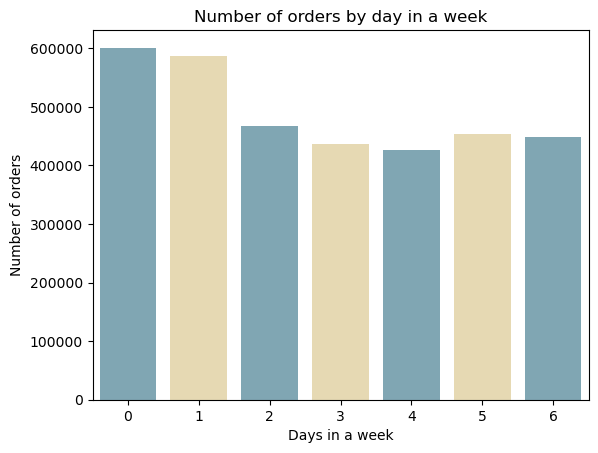

In [20]:
sns.countplot(data = orders, x = 'order_dow')
plt.title('Number of orders by day in a week')
plt.xlabel('Days in a week')
plt.ylabel('Number of orders')

why is the colour pallete not updated here?

Most of the orders have come from Sunday

Text(0, 0.5, 'Number of orders')

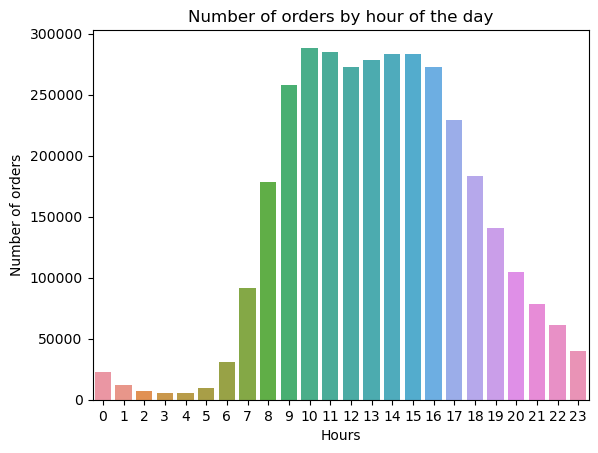

In [21]:
sns.countplot(data = orders, x = 'order_hour_of_day')
plt.title('Number of orders by hour of the day')
plt.xlabel('Hours')
plt.ylabel('Number of orders')

Most of the orders were ordered from morning 5AM to eveng 4PM

## Feature Engineering

In [22]:
#merging orders and prior datasets
prior_orders = pd.merge(orders, order_products_prior, on='order_id', how='inner')
prior_orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,2539329,1,0,1,2,8,30.0,196,1,0
1,2539329,1,0,1,2,8,30.0,14084,2,0
2,2539329,1,0,1,2,8,30.0,12427,3,0
3,2539329,1,0,1,2,8,30.0,26088,4,0
4,2539329,1,0,1,2,8,30.0,26405,5,0


In [23]:
#deleting prior dataset
del order_products_prior
gc.collect()

97

but why are we merging orders and orders_products_prior table for creating new features? why aren't we using the orders_product_train table?
(Why Not Use order_products_train) - data leakage avtadi anta

### Creating features using user_id
User - level interaction

In [24]:
# Total number of orders placed by each user.
users = prior_orders.groupby('user_id')['order_number'].agg('max').to_frame('u_num_of_orders')
users.head()

,u_num_of_orders
user_id,
1,10
2,14
3,12
4,5
5,4


In [25]:
# When does the user place most of the orders? - in which day of the week?
u_dow = prior_orders.groupby('user_id')['order_dow'].agg(lambda x:statistics.mode(x)).to_frame('dow_u_most_orders')
u_dow.head()

,dow_u_most_orders
user_id,
1,4
2,2
3,0
4,4
5,3


In [26]:
# Average number of products bought by each user
#1. First getting the total number of products in each order.
total_prd_per_order = prior_orders.groupby(by=['user_id', 'order_id'])['product_id'].aggregate('count').to_frame('total_products_per_order').reset_index()

#2. Getting the average products purchased by each user
avg_products = total_prd_per_order.groupby(by=['user_id'])['total_products_per_order'].mean().to_frame('u_avg_prd')
avg_products.head()

#deleting the total_prd_per_order dataframe
del [total_prd_per_order]
gc.collect()

avg_products.head()

,u_avg_prd
user_id,
1,5.900000
2,13.928571
3,7.333333
4,3.600000
5,9.250000


In [27]:
# Which hour of the day, the user has placed most of the orders?
u_hod = prior_orders.groupby('user_id')['order_hour_of_day'].agg(lambda x:statistics.mode(x)).to_frame('hod_u_most_orders')
u_hod.head()

,hod_u_most_orders
user_id,
1,7
2,9
3,16
4,15
5,18


In [28]:
# Reorder ratio for each user
u_reorder = prior_orders.groupby(by='user_id')['reordered'].aggregate('mean').to_frame('u_reorder_ratio')
u_reorder.head()

,u_reorder_ratio
user_id,
1,0.694915
2,0.476923
3,0.625000
4,0.055556
5,0.378378


In [29]:
# Average days between orders for each user
avg_days = prior_orders.groupby(by='user_id')['days_since_prior_order'].agg('mean').to_frame('avg_days_between_orders')
avg_days.head()

,avg_days_between_orders
user_id,
1,21.084746
2,16.902564
3,13.590909
4,18.611111
5,19.108108


In [30]:
#Total items bought by each user 
total_items = prior_orders.groupby(['user_id']).size().to_frame('u_total_iems_bought')
total_items.head()

,u_total_iems_bought
user_id,
1,59
2,195
3,88
4,18
5,37


Merging all the user id tables to create a user level interaction table

In [31]:
users = pd.concat([users, u_dow, u_hod, u_reorder, avg_days, avg_products, total_items], axis = 1).reset_index()
users.rename(columns = {'index':'user_id'})
users.head()

,user_id,u_num_of_orders,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,avg_days_between_orders,u_avg_prd,u_total_iems_bought
0,1,10,4,7,0.694915,21.084746,5.900000,59
1,2,14,2,9,0.476923,16.902564,13.928571,195
2,3,12,0,16,0.625000,13.590909,7.333333,88
3,4,5,4,15,0.055556,18.611111,3.600000,18
4,5,4,3,18,0.378378,19.108108,9.250000,37


In [32]:
#deleting unwwanted df
del [u_reorder, u_dow, u_hod, avg_products, avg_days, total_items]
gc.collect()

0

### Creating features uding product_id
Product Level interaction

In [33]:
# How many times did the product was bought by the user?
prd_bought = prior_orders.groupby('product_id').size().to_frame('p_num_of_times')
prd_bought.head()

,p_num_of_times
product_id,
1,1852
2,90
3,277
4,329
5,15


In [34]:
#reorder ratio for each product id - total number of times it was reordered/total number of times it was purchased
p_reorder = prior_orders.groupby('product_id')['reordered'].agg('mean').to_frame('p_reorder_ratio')
p_reorder.head()

,p_reorder_ratio
product_id,
1,0.613391
2,0.133333
3,0.732852
4,0.446809
5,0.600000


In [35]:
# Avg add to cart order for each product
p_add_to_cart = prior_orders.groupby('product_id')['add_to_cart_order'].agg('mean').to_frame('p_avg_cart_position')
p_add_to_cart.head()

,p_avg_cart_position
product_id,
1,5.801836
2,9.888889
3,6.415162
4,9.507599
5,6.466667


Merging all the product id tables to create product level interaction

In [36]:
prd = pd.concat([prd_bought, p_reorder, p_add_to_cart], axis = 1).reset_index()
prd.rename(columns = {'index':'product_id'})
prd.head()

,product_id,p_num_of_times,p_reorder_ratio,p_avg_cart_position
0,1,1852,0.613391,5.801836
1,2,90,0.133333,9.888889
2,3,277,0.732852,6.415162
3,4,329,0.446809,9.507599
4,5,15,0.600000,6.466667


In [37]:
#deleting unwanted df.
del [prd_bought, p_reorder, p_add_to_cart]
gc.collect()

0

### Creating features between user and product
User - Product level interaction

In [56]:
# How many times a user has bought a product
uxp = prior_orders.groupby(by=['user_id', 'product_id'])['order_id'].aggregate('count').to_frame('uxp_times_bought').reset_index()
uxp.head()

,user_id,product_id,uxp_times_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [51]:
# How many times a user had bought a product after its first purchase
times = prior_orders.groupby(by=['user_id', 'product_id'])['order_id'].aggregate('count').to_frame('times_bought').reset_index()
times.head()

,user_id,product_id,times_bought
0,1,196,10
1,1,10258,9
2,1,10326,1
3,1,12427,10
4,1,13032,3


In [46]:
#Total orders
total_orders = prior_orders.groupby('user_id')['order_number'].max().to_frame('total_orders').reset_index()
total_orders.head()

,user_id,total_orders
0,1,10
1,2,14
2,3,12
3,4,5
4,5,4


In [47]:
# In which order number(like in which order out of all the orders he placed?) the user first purchased the product
first_order_num = prior_orders.groupby(['user_id','product_id'])['order_number'].agg('min').to_frame('first_order_num').reset_index()
first_order_num.head()

,user_id,product_id,first_order_num
0,1,196,1
1,1,10258,2
2,1,10326,5
3,1,12427,1
4,1,13032,2


In [49]:
span = pd.merge(total_orders, first_order_num, on = 'user_id', how = 'right')
span.head()

,user_id,total_orders,product_id,first_order_num
0,1,10,196,1
1,1,10,10258,2
2,1,10,10326,5
3,1,10,12427,1
4,1,10,13032,2


In [50]:
#Calculating the order range.
# The +1 includes in the difference the first order were the product has been purchased
span['Order_Range_D'] = span.total_orders - span.first_order_num + 1
span.head()

,user_id,total_orders,product_id,first_order_num,Order_Range_D
0,1,10,196,1,10
1,1,10,10258,2,9
2,1,10,10326,5,6
3,1,10,12427,1,10
4,1,10,13032,2,9


In [52]:
#merging times df with the span
uxp_ratio = pd.merge(times, span, on=['user_id', 'product_id'], how='left')
uxp_ratio.head()

,user_id,product_id,times_bought,total_orders,first_order_num,Order_Range_D
0,1,196,10,10,1,10
1,1,10258,9,10,2,9
2,1,10326,1,10,5,6
3,1,12427,10,10,1,10
4,1,13032,3,10,2,9


In [53]:
#calculating the ratio.
uxp_ratio['uxp_reorder_ratio'] = uxp_ratio.times_bought / uxp_ratio.Order_Range_D
uxp_ratio.head()

,user_id,product_id,times_bought,total_orders,first_order_num,Order_Range_D,uxp_reorder_ratio
0,1,196,10,10,1,10,1.000000
1,1,10258,9,10,2,9,1.000000
2,1,10326,1,10,5,6,0.166667
3,1,12427,10,10,1,10,1.000000
4,1,13032,3,10,2,9,0.333333


In [54]:
#dropping all the unwanted columns.
uxp_ratio.drop(['times_bought', 'total_orders', 'first_order_num', 'Order_Range_D'], axis=1, inplace=True)
uxp_ratio.head()

,user_id,product_id,uxp_reorder_ratio
0,1,196,1.000000
1,1,10258,1.000000
2,1,10326,0.166667
3,1,12427,1.000000
4,1,13032,0.333333


In [55]:
#deleting all the unwanted df.
del [times, span, first_order_num, total_orders]
gc.collect()

10

In [57]:
#merging uxp_ratio with uxp.
uxp = uxp.merge(uxp_ratio, on=['user_id', 'product_id'], how='left')
#deleting uxp_ratio
del uxp_ratio
#calling garbage collector.
gc.collect()

0

In [58]:
uxp.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio
0,1,196,10,1.000000
1,1,10258,9,1.000000
2,1,10326,1,0.166667
3,1,12427,10,1.000000
4,1,13032,3,0.333333


In [61]:
#How many times a customer bought a product on its last 5 orders.
#Reversing the order number for each product.
prior_orders['order_number_back'] = prior_orders.groupby(by=['user_id'])['order_number'].transform(max) - prior_orders.order_number + 1
prior_orders.head()

/var/folders/3k/s3c6nxcs2r989s7pxzk9rh5r0000gn/T/ipykernel_31480/1806610451.py:3: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  prior_orders['order_number_back'] = prior_orders.groupby(by=['user_id'])['order_number'].transform(max) - prior_orders.order_number + 1


,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
0,2539329,1,0,1,2,8,30.0,196,1,0,10
1,2539329,1,0,1,2,8,30.0,14084,2,0,10
2,2539329,1,0,1,2,8,30.0,12427,3,0,10
3,2539329,1,0,1,2,8,30.0,26088,4,0,10
4,2539329,1,0,1,2,8,30.0,26405,5,0,10


In [62]:
#keeping only the first 5 orders from the order_number_back.
temp = prior_orders.loc[prior_orders.order_number_back <= 5]
temp.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,order_number_back
29,3367565,1,0,6,2,7,19.0,196,1,1,5
30,3367565,1,0,6,2,7,19.0,12427,2,1,5
31,3367565,1,0,6,2,7,19.0,10258,3,1,5
32,3367565,1,0,6,2,7,19.0,25133,4,1,5
33,550135,1,0,7,1,9,20.0,196,1,1,4


In [63]:
#product bought by users in the last_five orders.
last_five = temp.groupby(by=['user_id', 'product_id'])['order_id'].aggregate('count').to_frame('uxp_last_five').reset_index()
last_five.head()

,user_id,product_id,uxp_last_five
0,1,196,5
1,1,10258,5
2,1,12427,5
3,1,13032,2
4,1,25133,5


In [64]:
#ratio of the products bought in the last_five orders.
last_five['uxp_ratio_last_five'] = last_five.uxp_last_five / 5.0
# #changing the dtype.
# last_five['uxp_ratio_last_five'] = last_five['uxp_ratio_last_five'].astype(np.float16)
last_five.head()

,user_id,product_id,uxp_last_five,uxp_ratio_last_five
0,1,196,5,1.0
1,1,10258,5,1.0
2,1,12427,5,1.0
3,1,13032,2,0.4
4,1,25133,5,1.0


In [65]:
#merging this feature with uxp df.
uxp = uxp.merge(last_five, on=['user_id', 'product_id'], how='left')

del [last_five, temp]
gc.collect()
uxp.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five
0,1,196,10,1.000000,5.0,1.0
1,1,10258,9,1.000000,5.0,1.0
2,1,10326,1,0.166667,NaN,NaN
3,1,12427,10,1.000000,5.0,1.0
4,1,13032,3,0.333333,2.0,0.4


In [66]:
#filling the NAN values with 0.
uxp.fillna(0, inplace=True)
uxp.head(10)

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five
0,1,196,10,1.000000,5.0,1.0
1,1,10258,9,1.000000,5.0,1.0
2,1,10326,1,0.166667,0.0,0.0
3,1,12427,10,1.000000,5.0,1.0
4,1,13032,3,0.333333,2.0,0.4
5,1,13176,2,0.222222,0.0,0.0
6,1,14084,1,0.100000,0.0,0.0
7,1,17122,1,0.166667,0.0,0.0
8,1,25133,8,1.000000,5.0,1.0
9,1,26088,2,0.200000,0.0,0.0


### Merging users, product and uxp dataframes

In [67]:
# #Merge uxp features with the user features
# #Store the results on a new DataFrame
data = uxp.merge(users, on='user_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,avg_days_between_orders,u_avg_prd,u_total_iems_bought
0,1,196,10,1.000000,5.0,1.0,10,4,7,0.694915,21.084746,5.9,59
1,1,10258,9,1.000000,5.0,1.0,10,4,7,0.694915,21.084746,5.9,59
2,1,10326,1,0.166667,0.0,0.0,10,4,7,0.694915,21.084746,5.9,59
3,1,12427,10,1.000000,5.0,1.0,10,4,7,0.694915,21.084746,5.9,59
4,1,13032,3,0.333333,2.0,0.4,10,4,7,0.694915,21.084746,5.9,59


In [68]:
#Merging prd features with data.
data = data.merge(prd, on='product_id', how='left')
data.head()

,user_id,product_id,uxp_times_bought,uxp_reorder_ratio,uxp_last_five,uxp_ratio_last_five,u_num_of_orders,dow_u_most_orders,hod_u_most_orders,u_reorder_ratio,avg_days_between_orders,u_avg_prd,u_total_iems_bought,p_num_of_times,p_reorder_ratio,p_avg_cart_position
0,1,196,10,1.000000,5.0,1.0,10,4,7,0.694915,21.084746,5.9,59,35791,0.776480,3.721774
1,1,10258,9,1.000000,5.0,1.0,10,4,7,0.694915,21.084746,5.9,59,1946,0.713772,4.277492
2,1,10326,1,0.166667,0.0,0.0,10,4,7,0.694915,21.084746,5.9,59,5526,0.652009,4.191097
3,1,12427,10,1.000000,5.0,1.0,10,4,7,0.694915,21.084746,5.9,59,6476,0.740735,4.760037
4,1,13032,3,0.333333,2.0,0.4,10,4,7,0.694915,21.084746,5.9,59,3751,0.657158,5.622767


In [69]:
#deleting unwanted df.
del [users, prd, uxp]
gc.collect()

0

In [70]:
#shape of the dataset.
data.shape

(13307953, 16)